In [1]:
import cv2
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense
import matplotlib.pyplot as plt

In [2]:
# Load
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [3]:
train_images = train_images.reshape(60000, 784)
test_images = test_images.reshape(10000, 784)

In [4]:
train_images = train_images.astype('float32')/255.0
test_images = test_images.astype('float32')/255.0

In [5]:
train_labels = keras.utils.to_categorical(train_labels)
test_labels = keras.utils.to_categorical(test_labels)

In [6]:
# Model
model = Sequential()
model.add(Dense(784, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
#Train
model.fit(train_images, train_labels, epochs=20, batch_size=128)

Epoch 1/20


469/469 [==============================] - 9s 16ms/step - loss: 0.2286 - accuracy: 0.9329
Epoch 2/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0861 - accuracy: 0.9735
Epoch 3/20
469/469 [==============================] - 12s 26ms/step - loss: 0.0556 - accuracy: 0.9819
Epoch 4/20
469/469 [==============================] - 10s 21ms/step - loss: 0.0407 - accuracy: 0.9875
Epoch 5/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0331 - accuracy: 0.9891
Epoch 6/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0276 - accuracy: 0.9913
Epoch 7/20
469/469 [==============================] - 9s 18ms/step - loss: 0.0241 - accuracy: 0.9924
Epoch 8/20
469/469 [==============================] - 7s 15ms/step - loss: 0.0245 - accuracy: 0.9923
Epoch 9/20
469/469 [==============================] - 7s 16ms/step - loss: 0.0203 - accuracy: 0.9934
Epoch 10/20
469/469 [==============================] - 9s 19ms/step - loss: 0.0155 - a

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 784)               615440    
                                                                 
 dense_1 (Dense)             (None, 256)               200960    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 10)                650       
                                                                 
Total params: 858202 (3.27 MB)
Trainable params: 858202 (3.27 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [10]:
# evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 3ms/step - loss: 0.0732 - accuracy: 0.9834


In [11]:
# save model
# model.save('mnist.keras')

# The above line has been commented because by running the same model for several times, different predictions have been made,
# that's why when the model has predicted correctly, we have saved the model once. Please use the saved model

In [12]:
# load the model and predict
model = load_model('mnist.keras')

In [13]:
test_img = cv2.imread('seven.png', cv2.IMREAD_GRAYSCALE)

In [14]:
test_img_resized = cv2.resize(test_img, (28, 28))
test_img_flatten = test_img_resized.reshape(1, 784)
test_img_normalized = test_img_flatten.astype('float32')/255.

1/1 [==============================] - 0s 140ms/step
model predicted:  7


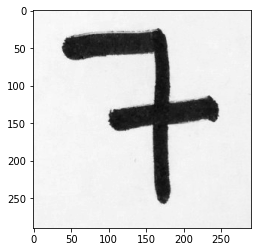

In [15]:
pred = model.predict(test_img_normalized)
prediced_label = np.argmax(pred)
plt.imshow(test_img, cmap='gray')
print("model predicted: ", prediced_label)